In [1]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

In [2]:

class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [3]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [4]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [5]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [6]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [7]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [8]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [9]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [10]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [11]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [12]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop


In [13]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [14]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [17]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()


In [19]:
def generate_random_city_list(num_of_cities):
    city_list = []
    for i in range(num_of_cities):
        city_list.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))
    return city_list

In [20]:
city_lists = {}

for i in [5,10,15,20,25]:
    city_lists[i] = [generate_random_city_list(i) for k in range(10)]    




Number of cities:5
Population size: 20
Number of generations: 40

1. simulation:
Initial distance: 321.7437990791191
Final distance: 321.74379907911907
Time:  0.1702644169999985
Best Route:
(60,159)(30,101)(10,29)(74,55)(79,142)

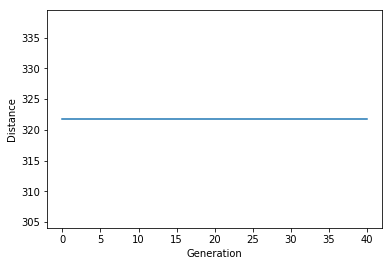


2. simulation:
Initial distance: 545.0124688377252
Final distance: 545.0124688377252
Time:  0.17043086899957416
Best Route:
(199,199)(91,195)(42,196)(123,121)(161,27)

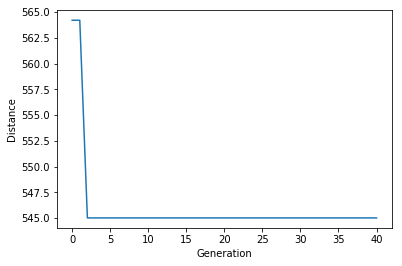


3. simulation:
Initial distance: 446.4269772363591
Final distance: 446.4269772363591
Time:  0.1711681739998312
Best Route:
(114,198)(7,146)(104,93)(168,64)(153,135)

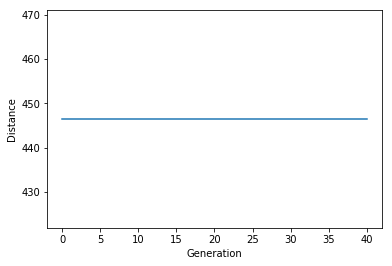


4. simulation:
Initial distance: 446.6381441682472
Final distance: 446.6381441682472
Time:  0.17015462499966816
Best Route:
(118,64)(74,86)(32,74)(89,160)(178,13)

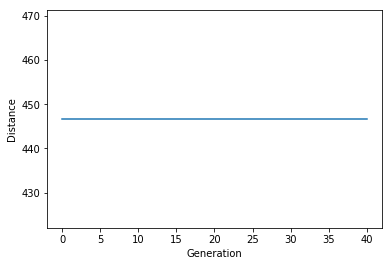


5. simulation:
Initial distance: 468.5837476831788
Final distance: 468.58374768317873
Time:  0.17274560300029407
Best Route:
(5,87)(0,112)(7,172)(153,196)(53,52)

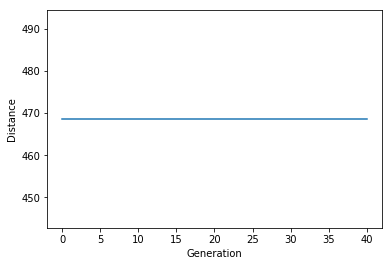


6. simulation:
Initial distance: 372.85392671616137
Final distance: 372.85392671616137
Time:  0.1714802789992973
Best Route:
(120,91)(24,121)(168,88)(186,95)(181,59)
7. simulation:
Initial distance: 434.8090710312236
Final distance: 434.8090710312236
Time:  0.17222972999934427
Best Route:
(90,7)(19,145)(38,141)(104,173)(118,177)
8. simulation:
Initial distance: 411.1329325097766
Final distance: 411.1329325097766
Time:  0.1690246059997662
Best Route:
(136,183)(189,178)(181,71)(191,10)(152,54)
9. simulation:
Initial distance: 315.1036824317775
Final distance: 315.10368243177743
Time:  0.16948058399975707
Best Route:
(73,49)(37,100)(4,134)(93,108)(127,106)
10. simulation:
Initial distance: 407.8850306125823
Final distance: 407.8850306125822
Time:  0.17118663300061598
Best Route:
(174,19)(122,152)(105,156)(72,54)(84,6)


Number of cities:10
Population size: 40
Number of generations: 80

1. simulation:
Initial distance: 812.2096188863791
Final distance: 582.1174276775643
Time:  0.670248884

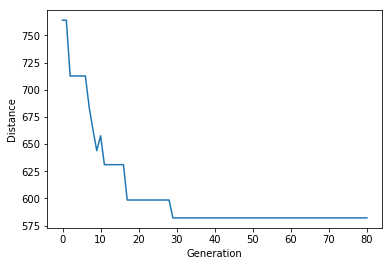


2. simulation:
Initial distance: 782.3056199523478
Final distance: 581.499413623136
Time:  0.6703976980006701
Best Route:
(70,33)(159,91)(179,145)(59,149)(1,150)(8,101)(33,111)(38,64)(16,21)(62,46)

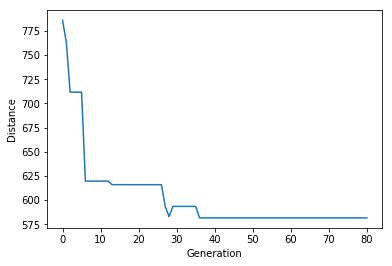


3. simulation:
Initial distance: 679.2848667881563
Final distance: 530.9961153078368
Time:  0.6727170849999311
Best Route:
(112,91)(91,28)(58,20)(69,65)(17,176)(132,192)(133,141)(99,136)(119,118)(107,108)

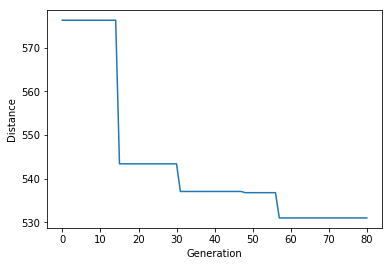


4. simulation:
Initial distance: 919.4851472716965
Final distance: 662.9835640260025
Time:  0.6707377110005837
Best Route:
(188,41)(182,98)(192,119)(176,178)(123,195)(97,143)(18,140)(72,99)(28,16)(158,20)

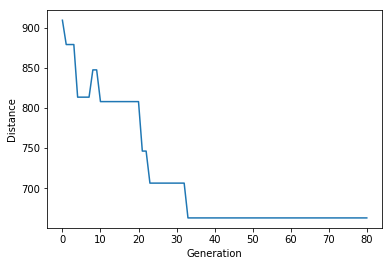


5. simulation:
Initial distance: 816.2088425081638
Final distance: 599.987467013493
Time:  0.6728709150002032
Best Route:
(23,144)(6,184)(88,183)(137,188)(117,130)(153,134)(153,76)(161,32)(88,19)(20,96)

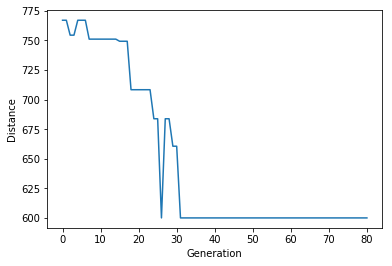


6. simulation:
Initial distance: 824.9166993449576
Final distance: 629.2116882725553
Time:  0.6884552450001138
Best Route:
(137,25)(138,50)(160,67)(197,95)(121,172)(84,153)(13,180)(30,107)(25,20)(92,66)
7. simulation:
Initial distance: 659.1366142993514
Final distance: 505.54495192233503
Time:  0.6758313139998791
Best Route:
(145,44)(97,80)(68,92)(37,142)(102,176)(157,191)(166,175)(127,126)(194,93)(149,48)
8. simulation:
Initial distance: 692.4164489822411
Final distance: 533.1332119049887
Time:  0.6845081609999397
Best Route:
(98,114)(58,153)(158,144)(197,78)(142,51)(159,16)(116,5)(70,21)(88,50)(110,98)
9. simulation:
Initial distance: 887.4711750133268
Final distance: 596.1787442701317
Time:  0.6715457519994743
Best Route:
(41,145)(81,127)(102,187)(185,155)(165,118)(183,30)(113,32)(40,51)(23,43)(29,89)
10. simulation:
Initial distance: 660.9604648346418
Final distance: 479.5793793575333
Time:  0.6728936890003752
Best Route:
(144,152)(161,193)(74,177)(83,132)(54,98)(56,76)(101,67)(13

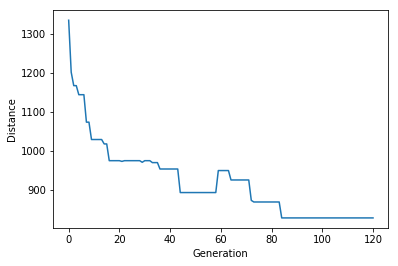


2. simulation:
Initial distance: 1224.014107158641
Final distance: 723.754166971017
Time:  1.839088226000058
Best Route:
(105,86)(124,72)(135,77)(133,59)(132,33)(21,23)(44,84)(46,118)(20,199)(17,177)(64,151)(88,150)(108,157)(198,181)(128,120)

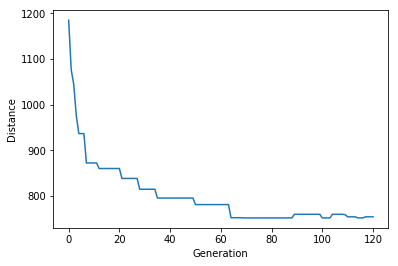


3. simulation:
Initial distance: 1189.0678424769221
Final distance: 734.349561164788
Time:  1.8375397710005927
Best Route:
(103,158)(148,157)(174,18)(101,94)(101,107)(73,119)(83,83)(82,70)(41,25)(6,8)(14,39)(18,80)(26,112)(40,181)(67,185)

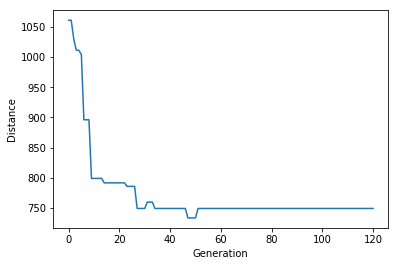


4. simulation:
Initial distance: 1021.5988966919145
Final distance: 677.2569991578978
Time:  1.8406583539999701
Best Route:
(120,114)(122,113)(137,104)(197,155)(180,179)(138,170)(128,116)(128,102)(145,77)(161,71)(168,12)(47,30)(67,69)(24,122)(39,120)

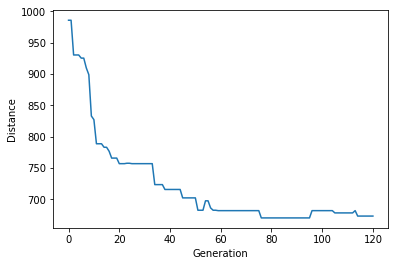


5. simulation:
Initial distance: 1260.9005341484199
Final distance: 672.5574267258346
Time:  1.7767711939995934
Best Route:
(197,79)(198,106)(195,135)(173,197)(60,176)(56,117)(9,84)(8,81)(29,55)(68,74)(137,41)(150,23)(167,12)(161,74)(152,83)

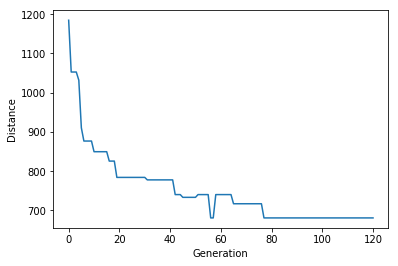


6. simulation:
Initial distance: 1025.1920270548364
Final distance: 646.7385552682223
Time:  1.8174021869999706
Best Route:
(179,110)(182,94)(153,90)(96,32)(98,24)(103,21)(104,39)(76,54)(25,4)(17,70)(43,77)(73,139)(69,134)(46,188)(110,168)
7. simulation:
Initial distance: 1147.2253503870295
Final distance: 628.5238620661044
Time:  1.798727479000263
Best Route:
(151,64)(180,31)(182,25)(151,7)(148,19)(124,16)(106,53)(88,63)(81,62)(7,88)(26,94)(45,127)(121,193)(127,150)(194,142)
8. simulation:
Initial distance: 1004.7073839526538
Final distance: 725.3268583412273
Time:  1.8490457049992983
Best Route:
(118,124)(70,122)(28,157)(82,153)(105,180)(119,167)(124,149)(176,163)(180,167)(197,155)(114,84)(49,39)(134,10)(147,69)(159,82)
9. simulation:
Initial distance: 1134.8501850876603
Final distance: 737.6423956399872
Time:  1.8485422680005286
Best Route:
(31,133)(5,195)(70,180)(112,199)(116,149)(184,70)(136,69)(89,61)(43,35)(35,5)(48,53)(86,94)(97,103)(101,108)(74,151)
10. simulation:
Initial di

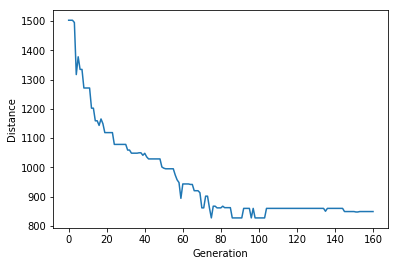


2. simulation:
Initial distance: 1576.412485211811
Final distance: 736.3306984249792
Time:  3.968363340999531
Best Route:
(131,33)(106,37)(73,73)(39,95)(37,70)(33,47)(11,19)(13,19)(56,28)(77,7)(103,155)(110,183)(130,179)(153,114)(169,99)(178,96)(137,60)(174,44)(160,20)(163,26)

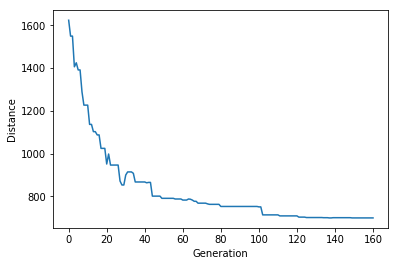


3. simulation:
Initial distance: 1872.5469360379468
Final distance: 925.9248440866945
Time:  3.95414013699974
Best Route:
(122,198)(172,196)(142,152)(96,197)(39,189)(21,171)(11,121)(36,102)(23,72)(34,60)(16,7)(117,17)(199,8)(139,70)(161,81)(174,59)(171,93)(159,102)(166,112)(138,124)

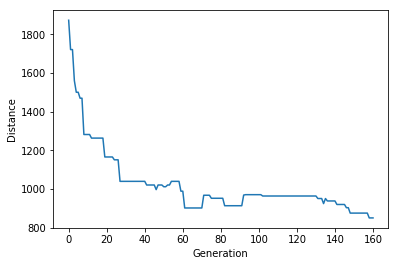


4. simulation:
Initial distance: 1733.3549659755638
Final distance: 781.5233094106692
Time:  3.9433263279997846
Best Route:
(18,100)(0,77)(13,28)(64,43)(100,0)(107,33)(143,25)(159,75)(152,104)(162,105)(164,150)(78,123)(93,107)(100,168)(97,176)(97,179)(40,179)(7,198)(30,127)(29,123)

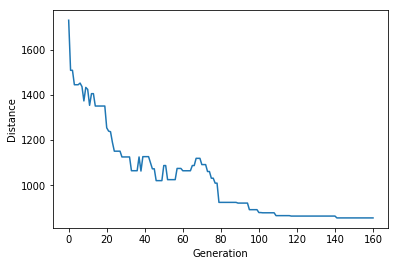


5. simulation:
Initial distance: 1659.3972238365998
Final distance: 822.8516822303453
Time:  3.954972160999205
Best Route:
(74,9)(104,34)(123,56)(137,63)(158,80)(196,56)(186,132)(176,119)(145,140)(108,172)(119,195)(37,190)(49,115)(92,124)(78,110)(60,109)(42,83)(70,58)(0,31)(27,29)

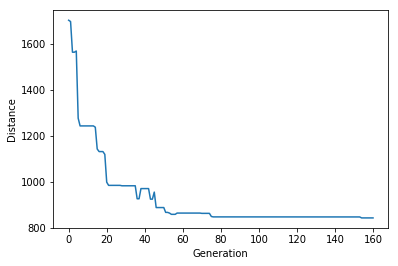


6. simulation:
Initial distance: 1674.9755442779488
Final distance: 962.9864867345201
Time:  3.9914772550000635
Best Route:
(6,67)(24,19)(44,24)(127,47)(183,27)(186,5)(166,158)(137,195)(82,178)(34,145)(0,197)(41,169)(59,162)(95,105)(126,109)(105,127)(39,118)(43,81)(43,80)(30,65)
7. simulation:
Initial distance: 1631.080820677641
Final distance: 848.4603219345661
Time:  3.931507309999688
Best Route:
(45,125)(27,166)(122,194)(117,160)(128,78)(123,42)(127,13)(147,27)(151,30)(198,28)(173,56)(164,55)(180,85)(195,91)(179,100)(127,112)(82,85)(80,9)(38,28)(56,109)
8. simulation:
Initial distance: 1549.5779270078872
Final distance: 690.5558567164265
Time:  3.8963644770001338
Best Route:
(62,82)(41,54)(16,38)(29,33)(39,23)(84,14)(125,18)(159,43)(137,58)(170,107)(186,112)(167,188)(155,185)(105,131)(67,117)(21,134)(33,130)(47,116)(80,109)(80,81)
9. simulation:
Initial distance: 1785.4374241936443
Final distance: 779.6139001660213
Time:  3.907555780000621
Best Route:
(36,139)(21,141)(14,123)(57,44

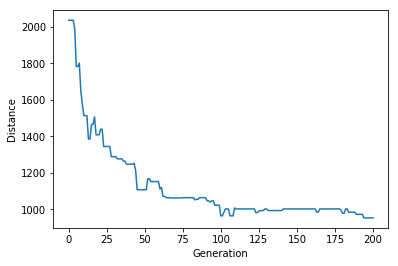


2. simulation:
Initial distance: 1862.991969875634
Final distance: 934.1059997577322
Time:  7.3965315309997095
Best Route:
(130,145)(110,100)(96,96)(126,89)(41,61)(61,52)(138,20)(147,23)(183,33)(181,81)(185,87)(156,109)(121,93)(114,118)(103,128)(95,190)(94,175)(48,171)(38,164)(44,199)(109,180)(136,154)(156,177)(193,193)(144,159)

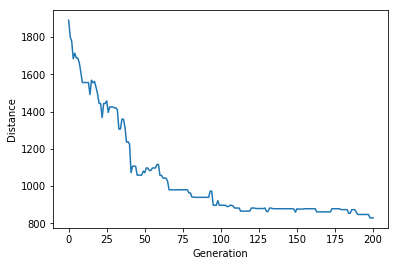


3. simulation:
Initial distance: 2079.540053400464
Final distance: 934.1574569673749
Time:  7.346321570999862
Best Route:
(90,2)(122,20)(145,21)(131,60)(36,108)(32,108)(32,124)(16,143)(0,142)(81,195)(89,193)(130,171)(128,119)(111,118)(137,145)(125,173)(157,169)(194,177)(197,123)(184,113)(174,106)(187,37)(188,57)(161,73)(123,50)

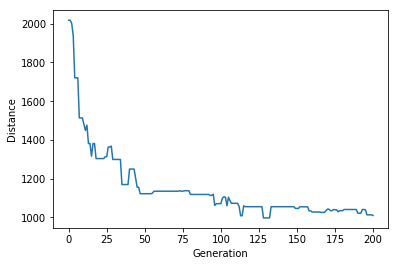


4. simulation:
Initial distance: 2294.852537511836
Final distance: 1048.132322783728
Time:  7.328899888000706
Best Route:
(124,125)(169,138)(160,176)(107,171)(137,160)(111,158)(62,158)(68,170)(5,197)(21,88)(41,69)(8,8)(60,18)(80,6)(71,9)(57,23)(148,29)(162,3)(182,15)(171,15)(167,68)(169,54)(126,94)(82,102)(90,79)

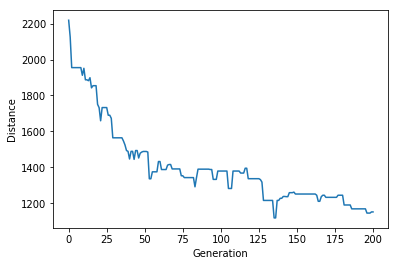


5. simulation:
Initial distance: 2318.443444213981
Final distance: 1048.2201060367884
Time:  7.277396885000599
Best Route:
(158,149)(181,189)(179,198)(74,188)(45,167)(49,163)(100,166)(6,150)(8,143)(0,108)(4,105)(2,40)(93,53)(115,43)(121,28)(140,1)(180,61)(183,40)(196,44)(199,82)(187,163)(155,154)(153,127)(133,89)(123,80)

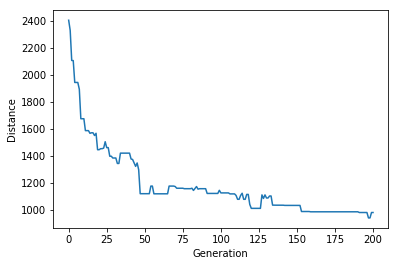


6. simulation:
Initial distance: 1951.8840848502655
Final distance: 1025.6746986091791
Time:  7.395276160999856
Best Route:
(186,48)(174,21)(184,61)(179,91)(197,166)(192,189)(167,184)(107,195)(113,143)(106,113)(1,181)(18,138)(21,58)(46,60)(50,74)(48,85)(87,51)(133,31)(86,8)(71,32)(89,57)(79,69)(96,81)(115,88)(143,77)
7. simulation:
Initial distance: 2201.6830422223306
Final distance: 961.8663094634464
Time:  7.236690202000318
Best Route:
(28,185)(2,176)(38,176)(82,139)(89,143)(121,113)(116,111)(41,75)(30,77)(22,78)(15,93)(23,68)(23,58)(44,55)(5,13)(77,12)(164,0)(183,22)(164,74)(164,85)(163,82)(168,91)(155,124)(195,191)(86,193)
8. simulation:
Initial distance: 1789.2902321543613
Final distance: 1007.5623345420385
Time:  7.459749427999668
Best Route:
(6,177)(23,158)(65,146)(97,119)(109,146)(98,150)(118,156)(123,171)(96,193)(125,140)(182,127)(187,28)(197,64)(150,17)(104,8)(107,82)(112,65)(92,65)(108,37)(65,33)(49,89)(46,60)(56,114)(44,148)(26,154)
9. simulation:
Initial distance: 2024.38

In [29]:
import timeit


for num_city in city_lists:
    city_list = city_lists[num_city] # vraca 10 gradova za 5,10,15,20,25
    pop_size = num_city*4
    generations=num_city*8
    print(f"\n\n\nNumber of cities:{num_city}")
    print("Population size:",pop_size)
    print("Number of generations:",generations)
    for count, cities in enumerate(city_list,1):
        print(f"\n{count}. simulation:")

        start = timeit.default_timer()
        best_route = geneticAlgorithm(population=cities, popSize=pop_size, eliteSize=pop_size//10, mutationRate=0.01, generations=generations)
        stop = timeit.default_timer()
        print('Time: ', stop - start) 
        print("Best Route:")
        for el in best_route:
            print(el,end='')
        if(count<=5):
            geneticAlgorithmPlot(population=cities, popSize=pop_size, eliteSize=pop_size//10, mutationRate=0.01, generations=pop_size*2)
        
